# Importer les données

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('px-x-1703030000_101_1982_2020.csv', encoding = "ISO-8859-1", low_memory=False) 
# importer la base de données avec le taux de participation

In [4]:
df2 = pd.read_excel('je-f-21.03.01.xls')

In [5]:
df.head()

,Commune,Date et objet,Electeurs inscrits,Participation en %,Oui en %
0,......Châtillon (FR),2020-02-09 Modification du 14 décembre 2018 du...,353,39.1,73.5
1,......Châtillon (FR),2020-02-09 Initiative populaire du 18 octobre ...,353,39.4,46.4
2,......Châtillon (FR),2019-05-19 Arrêté fédéral portant approbation ...,346,47.1,66.9
3,......Châtillon (FR),2019-05-19 Loi fédérale relative à la réforme ...,346,47.7,78.5
4,......Châtillon (FR),2019-02-10 Initiative populaire «Stopper le mi...,346,43.1,35.1


In [6]:
df.shape
# voir la taille du dataframe

(230010, 5)

In [7]:
len(df['Commune'].unique())

697

In [8]:
len(df['Date et objet'].unique())

330

In [9]:
df.dtypes
# vérifier le format des données

Commune               object
Date et objet         object
Electeurs inscrits    object
Participation en %    object
Oui en %              object
dtype: object

In [10]:
df2.head()

,Commune,Population totale (en 2018),Densité de la population par km² (en 2018),Population de 0-19 ans (en 2018),Population de 20-64 ans (en 2018),Population de 65 ans ou plus (en 2018),Surface totale en km²,% PLR (EF 2019),% PDC (EF 2019),% PS (EF 2019),% UDC (EF 2019),% PES (EF 2019)
0,Aeugst am Albis,1982,250.568900,19.677094,62.764884,17.558022,7.91,16.421,2.49797,11.5651,30.381,15.0505
1,Affoltern am Albis,12229,1154.768650,20.508627,61.329626,18.161747,10.59,13.3854,4.53534,14.6453,30.3069,12.5906
2,Bonstetten,5548,746.702557,23.666186,60.310022,16.023792,7.43,15.355,3.86796,16.7429,26.1163,12.3685
3,Hausen am Albis,3701,272.132353,21.804918,60.686301,17.508781,13.60,11.1352,3.93455,13.7115,33.1848,16.7441
4,Hedingen,3734,571.822358,21.772898,61.756829,16.470273,6.53,13.9909,3.87366,16.7383,26.6018,12.3487


# Nettoyer les données du premier dataframe

In [11]:
df['Commune'] = df['Commune'].str.replace('\......', '')
# nettoyer les données de la colonne 'Commune'

In [12]:
df.head()

,Commune,Date et objet,Electeurs inscrits,Participation en %,Oui en %
0,Châtillon (FR),2020-02-09 Modification du 14 décembre 2018 du...,353,39.1,73.5
1,Châtillon (FR),2020-02-09 Initiative populaire du 18 octobre ...,353,39.4,46.4
2,Châtillon (FR),2019-05-19 Arrêté fédéral portant approbation ...,346,47.1,66.9
3,Châtillon (FR),2019-05-19 Loi fédérale relative à la réforme ...,346,47.7,78.5
4,Châtillon (FR),2019-02-10 Initiative populaire «Stopper le mi...,346,43.1,35.1


In [13]:
new = df['Date et objet'].str.split(" ", n = 1, expand = True)
df['Date'] = new[0]
df['Objet'] = new[1]
df.drop(columns =['Date et objet'], inplace = True) 
# séparer la colonne 'Date et objet' en deux colonnes 'Date' et 'Objet'

In [14]:
df.index = pd.to_datetime( df['Date'] )
df.drop(columns =['Date'], inplace = True) 
# transformer la colonne 'Date' en index

In [15]:
df = df[df['Participation en %'] != '...']
df = df[df['Oui en %'] != '...']
df = df[df['Electeurs inscrits'] != '...']
# supprimer les lignes avec des données manquantes

In [16]:
df['Participation en %'] = df['Participation en %'].astype(float)
df['Oui en %'] = df['Oui en %'].astype(float)
df['Electeurs inscrits'] = df['Electeurs inscrits'].astype(int)
# transformer en int et en float

In [17]:
df.dtypes
# vérifier le format des données

Commune                object
Electeurs inscrits      int64
Participation en %    float64
Oui en %              float64
Objet                  object
dtype: object

In [18]:
df.head()

,Commune,Electeurs inscrits,Participation en %,Oui en %,Objet
Date,,,,,
2020-02-09,Châtillon (FR),353,39.1,73.5,Modification du 14 décembre 2018 du code pénal...
2020-02-09,Châtillon (FR),353,39.4,46.4,Initiative populaire du 18 octobre 2016 «Davan...
2019-05-19,Châtillon (FR),346,47.1,66.9,Arrêté fédéral portant approbation et mise en ...
2019-05-19,Châtillon (FR),346,47.7,78.5,Loi fédérale relative à la réforme fiscale et ...
2019-02-10,Châtillon (FR),346,43.1,35.1,Initiative populaire «Stopper le mitage - pour...


# Nettoyer les données du deuxième dataframe

In [19]:
liste_communes = df['Commune'].unique().tolist()
# créer une liste de toutes les communes romandes

In [20]:
df2 = df2[ df2['Commune'].isin( liste_communes ) ]
# ne sélectionner que les communes romandes

In [21]:
df2.head()

,Commune,Population totale (en 2018),Densité de la population par km² (en 2018),Population de 0-19 ans (en 2018),Population de 20-64 ans (en 2018),Population de 65 ans ou plus (en 2018),Surface totale en km²,% PLR (EF 2019),% PDC (EF 2019),% PS (EF 2019),% UDC (EF 2019),% PES (EF 2019)
668,Châtillon (FR),466,358.461538,21.888412,60.085837,18.025751,1.30,18.4211,15.365,21.2224,21.9864,8.82852
669,Cheiry,416,64.496124,24.038462,60.576923,15.384615,6.45,10.5702,11.6829,14.0473,41.5855,12.6565
670,Cugy (FR),1752,177.327935,24.086758,60.616438,15.296804,9.88,27.4125,15.2174,18.3987,20.7317,8.58961
671,Fétigny,1060,258.536585,26.981132,58.962264,14.056604,4.10,14.1364,14.4848,16.7247,39.1239,7.2673
672,Gletterens,1071,418.359375,23.342670,61.064426,15.592904,2.58,16.1372,7.06001,24.4075,30.4085,7.76601


# Créer un nouveau dataframe avec la participation moyenne

In [22]:
df5 = df.groupby('Commune')['Participation en %'].mean().round(1)

In [23]:
df5.to_frame()

,Participation en %
Commune,
Aclens,45.8
Agarn,41.2
Agiez,46.1
Aigle,37.6
Aire-la-Ville,56.5
...,...
Yvonand,42.0
Yvorne,41.9
Zeneggen,43.7


In [24]:
df6 = pd.merge(df5, df2, on ='Commune', how ='right')

In [25]:
df6.rename(columns={'Participation en %': 'Participation en % (1982-2020)'}, inplace=True)

In [26]:
df6.head()

,Commune,Participation en % (1982-2020),Population totale (en 2018),Densité de la population par km² (en 2018),Population de 0-19 ans (en 2018),Population de 20-64 ans (en 2018),Population de 65 ans ou plus (en 2018),Surface totale en km²,% PLR (EF 2019),% PDC (EF 2019),% PS (EF 2019),% UDC (EF 2019),% PES (EF 2019)
0,Aclens,45.8,535,137.179487,22.616822,63.364486,14.018692,3.90,23.5035,0.367242,21.4469,22.0345,16.1586
1,Agarn,41.2,718,93.856209,15.738162,64.484680,19.777159,7.65,0.954575,65.8986,7.66952,20.9348,3.75247
2,Agiez,46.1,326,59.706960,23.926380,62.269939,13.803681,5.46,24.4408,1.03655,12.1113,29.0235,14.0753
3,Aigle,37.6,10119,616.636197,22.462694,60.252989,17.284317,16.41,32.225,1.86055,18.6454,16.3888,14.7033
4,Aire-la-Ville,56.5,1184,404.095563,26.435811,60.304054,13.260135,2.93,20.7198,11.357,9.19261,18.4582,20.6955


# Nettoyer les données du nouveau dataframe

In [27]:
df6.dtypes

Commune                                        object
Participation en % (1982-2020)                float64
Population totale (en 2018)                     int64
Densité de la population par km² (en 2018)    float64
Population de 0-19 ans (en 2018)              float64
Population de 20-64 ans (en 2018)             float64
Population de 65 ans ou plus (en 2018)        float64
Surface totale en km²                         float64
% PLR (EF 2019)                                object
% PDC (EF 2019)                                object
% PS (EF 2019)                                 object
% UDC (EF 2019)                                object
% PES (EF 2019)                                object
dtype: object

In [28]:
df6 = df6.replace("*", 0) 

In [29]:
df6['% PLR (EF 2019)'] = df6['% PLR (EF 2019)'].astype(float)
df6['% PDC (EF 2019)'] = df6['% PDC (EF 2019)'].astype(float)
df6['% PS (EF 2019)'] = df6['% PS (EF 2019)'].astype(float)
df6['% UDC (EF 2019)'] = df6['% UDC (EF 2019)'].astype(float)
df6['% PES (EF 2019)'] = df6['% PES (EF 2019)'].astype(float)

In [30]:
df6.dtypes

Commune                                        object
Participation en % (1982-2020)                float64
Population totale (en 2018)                     int64
Densité de la population par km² (en 2018)    float64
Population de 0-19 ans (en 2018)              float64
Population de 20-64 ans (en 2018)             float64
Population de 65 ans ou plus (en 2018)        float64
Surface totale en km²                         float64
% PLR (EF 2019)                               float64
% PDC (EF 2019)                               float64
% PS (EF 2019)                                float64
% UDC (EF 2019)                               float64
% PES (EF 2019)                               float64
dtype: object

# Afficher les communes avec la participation la plus haute / la plus faible

In [31]:
df6.sort_values('Participation en % (1982-2020)', ascending=False).round(1).head(10)

,Commune,Participation en % (1982-2020),Population totale (en 2018),Densité de la population par km² (en 2018),Population de 0-19 ans (en 2018),Population de 20-64 ans (en 2018),Population de 65 ans ou plus (en 2018),Surface totale en km²,% PLR (EF 2019),% PDC (EF 2019),% PS (EF 2019),% UDC (EF 2019),% PES (EF 2019)
407,Mauraz,64.3,59,118.0,16.9,69.5,13.6,0.5,16.8,3.7,10.3,33.3,22.4
612,Trient,61.6,161,4.1,11.8,69.6,18.6,39.6,34.1,18.4,15.3,20.3,9.4
660,Villarsel-sur-Marly,60.4,84,60.4,14.3,77.4,8.3,1.4,14.0,21.5,2.5,31.5,22.0
537,Rovray,60.2,179,55.9,29.1,55.9,15.1,3.2,22.5,0.1,13.1,42.1,9.5
299,Gy,59.2,477,145.0,26.0,57.9,16.1,3.3,19.3,10.5,12.6,11.0,15.0
101,Cartigny,59.0,974,222.4,24.9,58.6,16.4,4.4,23.3,9.1,9.1,13.6,27.0
540,Russin,58.9,541,110.2,17.9,66.2,15.9,4.9,29.7,5.4,7.6,10.0,28.8
345,Laconnex,58.6,699,182.5,20.6,57.7,21.7,3.8,17.7,23.3,7.6,13.2,23.3
74,Bourg-Saint-Pierre,57.9,198,2.2,12.6,61.1,26.3,89.8,40.2,33.6,7.2,13.3,4.2
410,Mettembert,57.8,107,45.7,19.6,57.9,22.4,2.3,1.0,30.0,24.0,11.0,17.0


In [32]:
df6.sort_values('Participation en % (1982-2020)').round(1).head(10)

,Commune,Participation en % (1982-2020),Population totale (en 2018),Densité de la population par km² (en 2018),Population de 0-19 ans (en 2018),Population de 20-64 ans (en 2018),Population de 65 ans ou plus (en 2018),Surface totale en km²,% PLR (EF 2019),% PDC (EF 2019),% PS (EF 2019),% UDC (EF 2019),% PES (EF 2019)
536,Rougemont,29.9,882,18.2,17.5,54.8,27.8,48.5,30.5,1.0,10.9,42.5,6.8
289,Grengiols,30.3,424,7.2,18.9,59.9,21.2,58.5,3.1,52.4,5.6,31.7,6.0
295,Grächen,30.9,1251,87.7,16.9,62.5,20.6,14.3,0.5,54.6,15.4,26.2,2.8
691,Zermatt,31.2,5758,23.7,16.7,69.5,13.9,242.9,10.5,53.4,3.5,27.1,4.5
220,Ederswiler,31.6,122,36.9,15.6,53.3,31.1,3.3,0.0,20.0,0.0,71.4,8.6
617,Täsch,31.6,1322,22.5,21.8,67.6,10.6,58.7,3.4,50.4,4.7,33.7,6.0
282,Grandfontaine,31.8,395,44.0,23.5,55.2,21.3,9.0,9.4,31.8,26.9,22.7,4.2
619,Törbel,32.8,481,27.4,15.0,64.7,20.4,17.6,1.3,76.7,1.7,18.1,2.0
389,Lugnez,33.0,186,36.5,18.8,57.5,23.7,5.1,15.3,33.9,16.1,14.5,12.1
525,Roche (VD),33.2,1776,275.3,26.5,60.4,13.2,6.4,25.8,0.9,28.3,24.2,9.2


# Comparer les communes (nombre d'habitants, âge, surface)

In [33]:
lst = []

def cent(var):
    c = df6.sort_values('Participation en % (1982-2020)', ascending=False).head(100)[var].mean()
    d = df6.sort_values('Participation en % (1982-2020)').head(100)[var].mean()
    
    mini_dict = {'100 communes avec participation la plus haute':c,
                 '100 communes avec participation la plus faible':d}
    
    lst.append(mini_dict)

In [34]:
lst2 = ['Population totale (en 2018)', 'Surface totale en km²', 'Densité de la population par km² (en 2018)',
       'Population de 0-19 ans (en 2018)', 'Population de 20-64 ans (en 2018)',
       'Population de 65 ans ou plus (en 2018)', 
       '% PLR (EF 2019)', '% PDC (EF 2019)', '% PS (EF 2019)',
       '% UDC (EF 2019)', '% PES (EF 2019)']

In [35]:
for l in lst2:
    cent(l)

In [36]:
df7 = pd.DataFrame(lst, index=['Nombre d\'habitants', 'Surface en km2', 'Densité', 'Proportion de la population âgée de 0 à 19 ans', 'Proportion de la population âgée de 20 à 64 ans', 'Proportion de la population âgée de 65 ans ou plus', '% PLR', '% PDC', '% PS', '% UDC', '% PES'])

In [37]:
df7['100 communes avec participation la plus haute'] = df7['100 communes avec participation la plus haute'].round(1)
df7['100 communes avec participation la plus faible'] = df7['100 communes avec participation la plus faible'].round(1)

In [38]:
df7

,100 communes avec participation la plus haute,100 communes avec participation la plus faible
Nombre d'habitants,1120.6,3198.3
Surface en km2,14.1,24.5
Densité,286.8,394.1
Proportion de la population âgée de 0 à 19 ans,21.8,21.4
Proportion de la population âgée de 20 à 64 ans,59.8,60.5
Proportion de la population âgée de 65 ans ou plus,18.3,18.1
% PLR,23.0,17.0
% PDC,12.1,17.0
% PS,12.2,17.2
% UDC,22.0,25.1


In [39]:
df6[ df6['Participation en % (1982-2020)'] > 45 ].mean().round(1)['Population totale (en 2018)']
# Nombre moyen d'habitants pour les communes avec une participation supérieure à 45%

1648.4

In [40]:
df6[ df6['Participation en % (1982-2020)'] < 35 ].mean().round(1)['Population totale (en 2018)']
# Nombre moyen d'habitants pour les communes avec une participation inférieure à 35%

1618.2

In [41]:
df6[ (df6['Participation en % (1982-2020)'] >= 35) & (df6['Participation en % (1982-2020)'] <= 45) ].mean().round(1)['Population totale (en 2018)']
# Nombre moyen d'habitants pour les communes avec une participation entre 35% et 45%

4216.7

# Visualisations graphiques

In [42]:
df6['Log'] = np.log(df6['Population totale (en 2018)']) 
# Appliquer une échelle logarithmique à la colonne Population totale (en 2018)

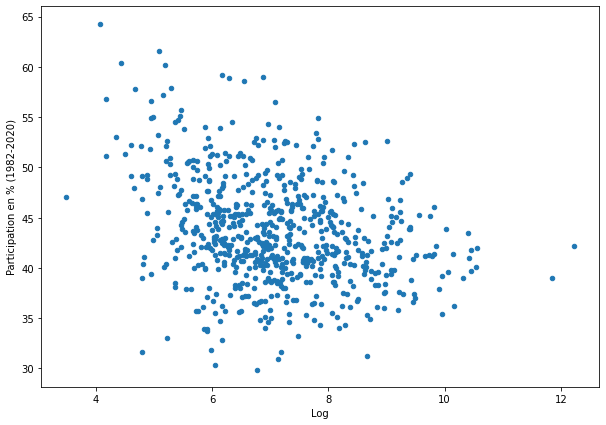

In [43]:
df6.plot(kind='scatter', x='Log', y='Participation en % (1982-2020)', figsize=(10,7))